# Stima dello smorzamento e della forzante

Per adesso ci occuperemo solo di calcolare lo smorzamento.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Mod.Fits import Fits

plt.style.use("Mod/mystyle.mplstyle")

## Calculate $k$ from static method

In [2]:
with open("Data/Misure k statiche pretensionata.csv", "r") as file:
    df = pd.read_csv(file, delimiter=";", decimal=",")


means = [df[f"Position (mm) Run #{i+1}"].mean() for i in range(3)]
# with error of 0.2mm

masse = [127.52, 147.2, 167.09][::-1]  # da excel

params, std_dev = Fits.linear(means, masse)

k_pretensionata = -params[0] * 9.805  # ? che valore usare per g?
std_err_p = std_dev[0] * 9.805  # p for pretensionata

print(f"k pretensionata: {k_pretensionata: 5.2f} ±{std_err_p: 5.2f}")

k pretensionata:  24.25 ± 0.14


### Repeat for non pretensionata

In [3]:
with open("Data/Misure k statiche non_pretensionata.csv", "r") as file:
    df = pd.read_csv(file, delimiter=";", decimal=",")

means = [df[f"Position (mm) Run #{i+1}"].mean() for i in range(3)]
# with error of 0.2mm

masse = [48.4, 67.95, 87.96]  # da excel

params, std_dev = Fits.linear(means, masse)

k_non_pretensionata = -params[0] * 9.805  # ? che valore usare per g?
std_err_np = std_dev[0] * 9.805  # np for non pretensionata

print(f"k non pretensionata: {k_non_pretensionata: 5.3f} ±{std_err_np: 5.3f}")

k non pretensionata:  3.226 ± 0.021


## Calcolo $\gamma$

I dataframe sono individuabili tramite:\
`pc`: oscillazioni molla pretensionata con il cd\
`pr`: oscillazioni molla pretensionata con la rete\
`nc`: oscillazioni molla non pretensionata con il cd\
`nr`: oscillazioni molla non pretensionata con la rete

[-19.8332248    0.06854244  12.9543509   -0.14882633   0.14075554]
[-2.13561294e+01 -5.59138233e-03 -1.91481421e-01  1.40155228e-01] 12.96208532680409
[17.13620287  0.05725121 11.48779835 -2.77348746 -0.16462573]
[-1.86028541e+01 -5.52947151e-03  4.05433096e-01 -1.71014774e-01] 11.482871626135157


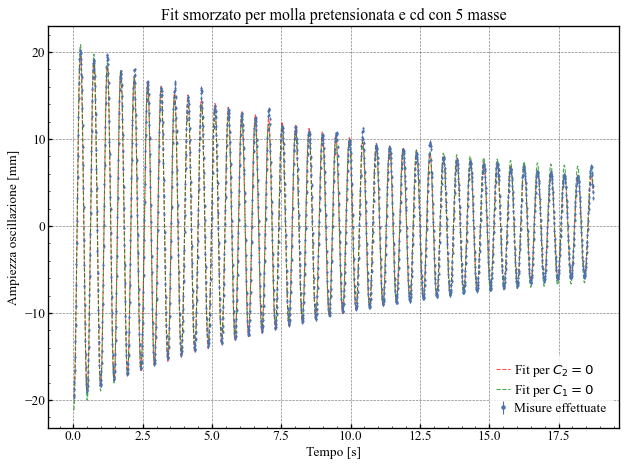

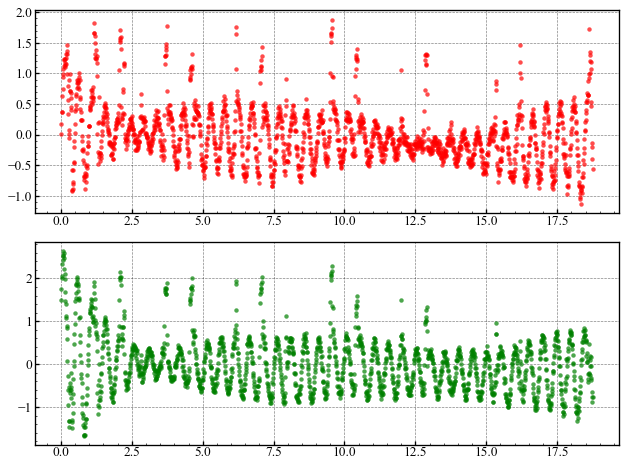

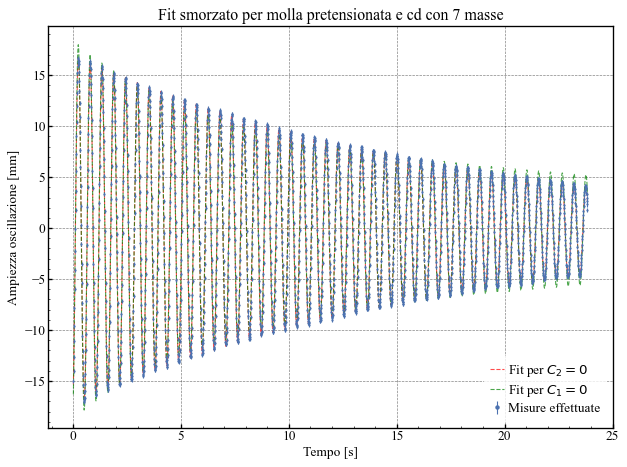

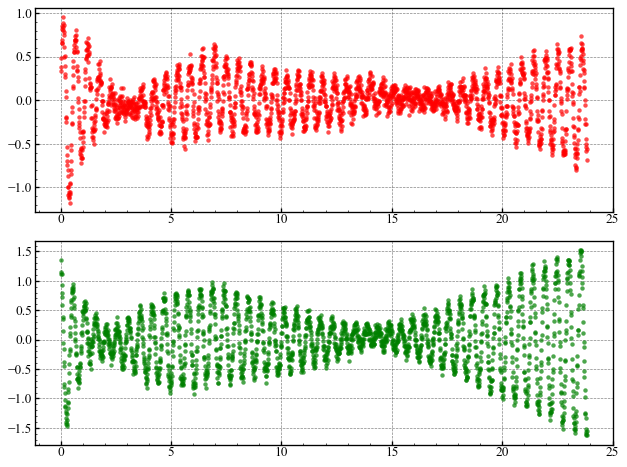

In [4]:
with open("Data/Oscillazioni pretensionata_cd_5e7masse.csv", "r") as file:
    df_pc = pd.read_csv(file, delimiter=";", decimal=",")

masse = [134.36, 173.94]  # Da excel

for i in range(2):
    fig, ax = plt.subplots()
    Y = df_pc.iloc[:, i].dropna()
    X = np.linspace(0.01, len(Y) / 100, len(Y))

    omega = np.sqrt(
        k_pretensionata
        / ((masse[i] + 29.91 / 3) / 1000)
        # 29.91/3 deriva dalla massa della molla
        # /1000 per convertire g in kg
    )

    params, std_dev = Fits.smorzato(X, Y)
    params2, std_dev2 = Fits.smorzato2(X, Y, omega)

    print(params)
    print(params2, omega)

    ax.plot(X, Fits.curve(X, *params), c="r", ls="--", alpha=0.7)
    ax.plot(X, Fits.curve2(X, *params2, omega), c="g", ls="--", alpha=0.7)
    ax.errorbar(X, Y, yerr=0.2, fmt=".")

    plt.title(f"Fit smorzato per molla pretensionata e cd con {5 if i==0 else 7} masse")
    ax.legend(
        ["Fit per $C_2 = 0$", "Fit per $C_1 = 0$", "Misure effettuate"],
        loc="lower right",
    )
    ax.set_xlabel("Tempo [s]")
    ax.set_ylabel("Ampiezza oscillazione [mm]")

    # * saving figure
    fig.savefig(f"Images/fit_pc_m{5 if i==0 else 7}.png")

    fig, ax = plt.subplots(2)
    ax[0].scatter(X, Y - Fits.curve(X, *params), c="r", alpha=0.7)
    ax[1].scatter(X, Y - Fits.curve2(X, *params2, omega), c="g", alpha=0.7)

### CI SONO DELLE SBAVATURE

## Repeat for the other 3 cases

[17.7750401   0.07824555 13.17437779 -2.75527925 -0.03763684]
[-1.93989451e+01 -7.52248447e-03  4.05269433e-01 -4.52767517e-02] 13.171361324665357
[-22.49277308   0.06801902  11.63111402  -0.70789212  -0.25614471]
[-2.42812210e+01 -4.98294928e-03 -6.86746615e-01 -2.57361617e-01] 11.627932212798173


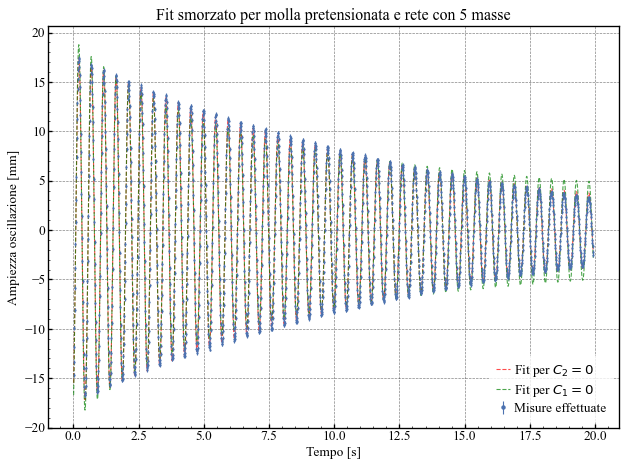

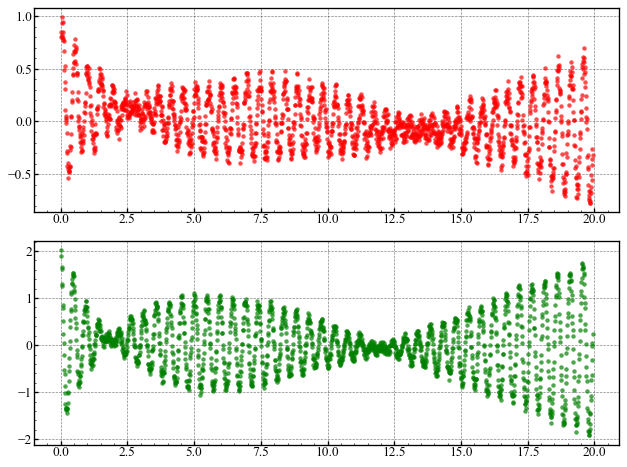

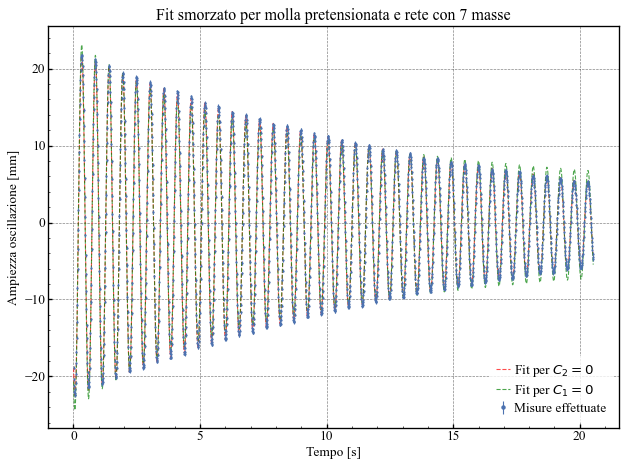

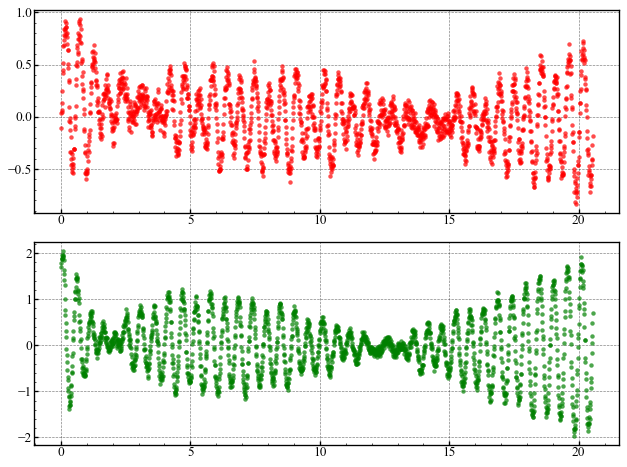

In [5]:
with open("Data/Oscillazioni pretensionata_rete_5e7masse.csv", "r") as file:
    df_pr = pd.read_csv(file, delimiter=";", decimal=",")

masse = [129.81, 169.38]  # Da excel

for i in range(2):
    fig, ax = plt.subplots()
    Y = df_pr.iloc[:, i].dropna()
    X = np.linspace(0.01, len(Y) / 100, len(Y))

    omega = np.sqrt(
        k_pretensionata
        / ((masse[i] + 29.91 / 3) / 1000)
        # 29.91/3 deriva dalla massa della molla
        # /1000 per convertire g in kg
    )

    params, std_dev = Fits.smorzato(X, Y)
    params2, std_dev2 = Fits.smorzato2(X, Y, omega)

    print(params)
    print(params2, omega)

    ax.plot(X, Fits.curve(X, *params), c="r", ls="--", alpha=0.7)
    ax.plot(X, Fits.curve2(X, *params2, omega), c="g", ls="--", alpha=0.7)
    ax.errorbar(X, Y, yerr=0.2, fmt=".")

    plt.title(
        f"Fit smorzato per molla pretensionata e rete con {5 if i==0 else 7} masse"
    )
    ax.legend(
        ["Fit per $C_2 = 0$", "Fit per $C_1 = 0$", "Misure effettuate"],
        loc="lower right",
    )
    ax.set_xlabel("Tempo [s]")
    ax.set_ylabel("Ampiezza oscillazione [mm]")

    # * saving figure
    fig.savefig(f"Images/fit_pr_m{5 if i==0 else 7}.png")

    fig, ax = plt.subplots(2)
    ax[0].scatter(X, Y - Fits.curve(X, *params), c="r", alpha=0.7)
    ax[1].scatter(X, Y - Fits.curve2(X, *params2, omega), c="g", alpha=0.7)

[24.38088341  0.04514584  5.82972118 -1.48767338 -0.30335797]
[ 2.68107332e+01  3.25781999e-03 -1.36609456e+00 -3.02420101e-01] 5.817137767352778
[31.17756916  0.09298998  7.58382708 -1.06269861 -0.10452689]
[ 3.51735630e+01  5.62016694e-03 -1.16885651e+00 -1.51169503e-01] 7.604937672192234


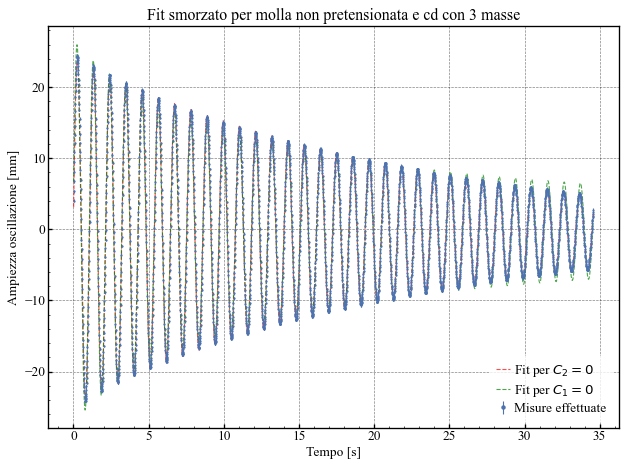

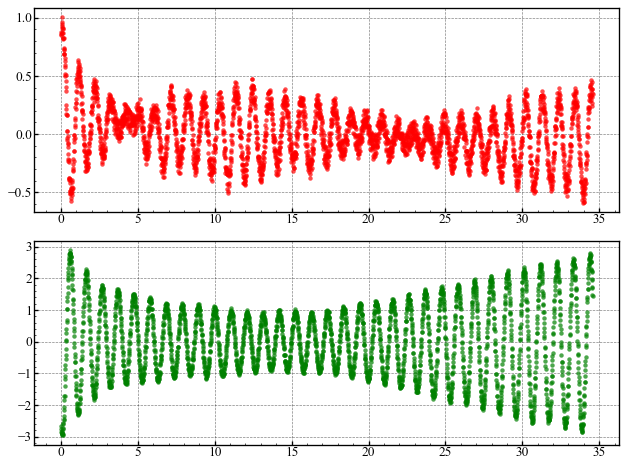

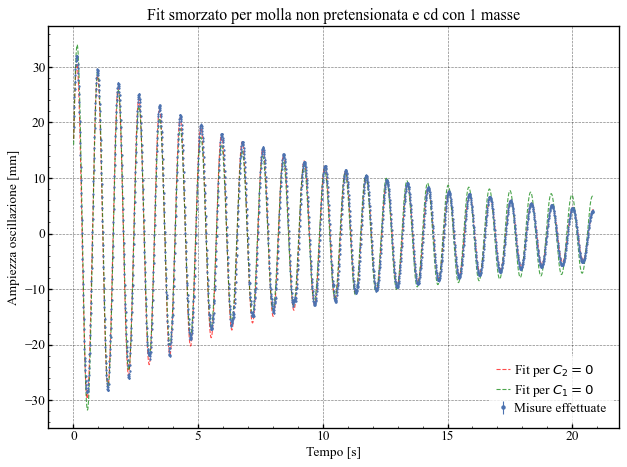

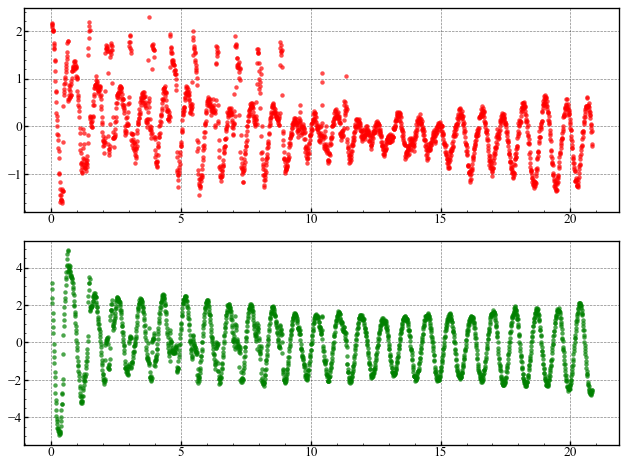

In [6]:
with open("Data/Oscillazioni non_pretensionata_rete_3e1masse.csv", "r") as file:
    df_nr = pd.read_csv(file, delimiter=";", decimal=",")

masse = [90.18, 50.63]  # Da excel

for i in range(2):
    fig, ax = plt.subplots()
    Y = df_nr.iloc[:, i].dropna()
    X = np.linspace(0.01, len(Y) / 100, len(Y))

    omega = np.sqrt(
        k_non_pretensionata
        / ((masse[i] + 15.43 / 3) / 1000)
        # 29.91/3 deriva dalla massa della molla
        # /1000 per convertire g in kg
    )

    params, std_dev = Fits.smorzato(X, Y)
    params2, std_dev2 = Fits.smorzato2(X, Y, omega)

    print(params)
    print(params2, omega)

    ax.plot(X, Fits.curve(X, *params), c="r", ls="--", alpha=0.7)
    ax.plot(X, Fits.curve2(X, *params2, omega), c="g", ls="--", alpha=0.7)
    ax.errorbar(X, Y, yerr=0.2, fmt=".")

    plt.title(
        f"Fit smorzato per molla non pretensionata e cd con {3 if i==0 else 1} masse"
    )
    ax.legend(
        ["Fit per $C_2 = 0$", "Fit per $C_1 = 0$", "Misure effettuate"],
        loc="lower right",
    )
    ax.set_xlabel("Tempo [s]")
    ax.set_ylabel("Ampiezza oscillazione [mm]")

    # * saving figure
    fig.savefig(f"Images/fit_nc_m{3 if i==0 else 1}.png")

    fig, ax = plt.subplots(2)
    ax[0].scatter(X, Y - Fits.curve(X, *params), c="r", alpha=0.7)
    ax[1].scatter(X, Y - Fits.curve2(X, *params2, omega), c="g", alpha=0.7)

[-6.55508863e+01  4.69012544e-02  5.66226951e+00 -2.82023428e+00
 -7.21875256e-01]
[ 7.06909252e+01  1.22541492e-03  1.36437848e-01 -7.43870763e-01] 5.683370000291231
[32.55006227  0.07387974  7.25255031 -0.21638804 -0.21775454]
[ 3.56658574e+01  4.71810587e-03 -5.78607404e-01 -2.53249673e-01] 7.311900948987818


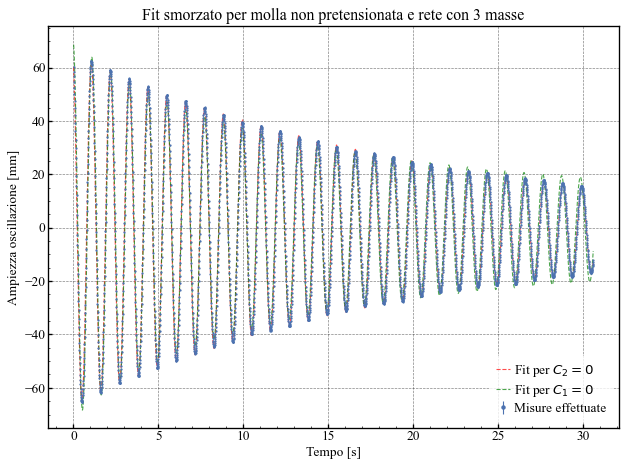

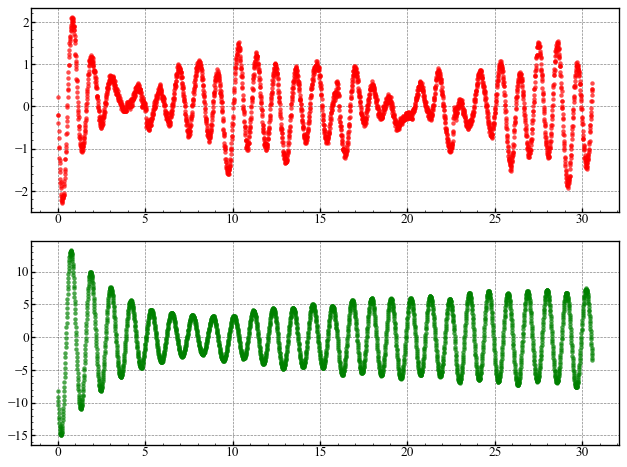

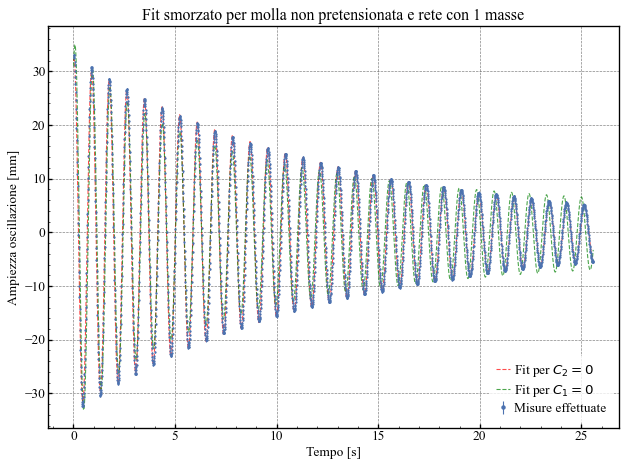

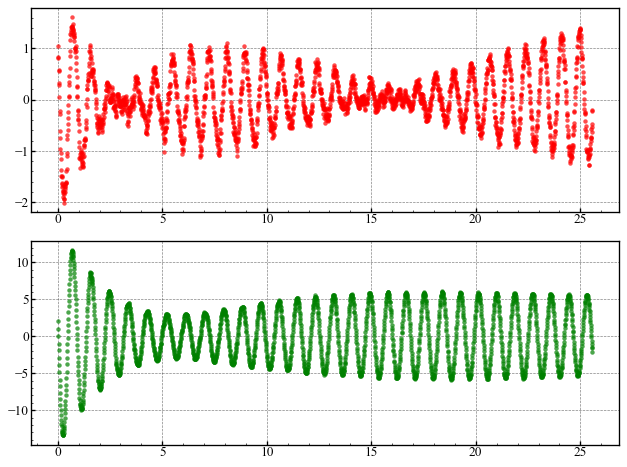

In [7]:
with open("Data/Oscillazioni non_pretensionata_cd_3e1masse.csv", "r") as file:
    df_nc = pd.read_csv(file, delimiter=";", decimal=",")

masse = [94.72, 55.19]  # Da excel

for i in range(2):
    fig, ax = plt.subplots()
    Y = df_nc.iloc[:, i].dropna()
    X = np.linspace(0.01, len(Y) / 100, len(Y))

    omega = np.sqrt(
        k_non_pretensionata
        / ((masse[i] + 15.43 / 3) / 1000)
        # 29.91/3 deriva dalla massa della molla
        # /1000 per convertire g in kg
    )

    params, std_dev = Fits.smorzato(X, Y)
    params2, std_dev2 = Fits.smorzato2(X, Y, omega)

    print(params)
    print(params2, omega)

    ax.plot(X, Fits.curve(X, *params), c="r", ls="--", alpha=0.7)
    ax.plot(X, Fits.curve2(X, *params2, omega), c="g", ls="--", alpha=0.7)
    ax.errorbar(X, Y, yerr=0.2, fmt=".")

    plt.title(
        f"Fit smorzato per molla non pretensionata e rete con {3 if i==0 else 1} masse"
    )
    ax.legend(
        ["Fit per $C_2 = 0$", "Fit per $C_1 = 0$", "Misure effettuate"],
        loc="lower right",
    )
    ax.set_xlabel("Tempo [s]")
    ax.set_ylabel("Ampiezza oscillazione [mm]")

    # * saving figure
    fig.savefig(f"Images/fit_nr_m{3 if i==0 else 1}.png")

    fig, ax = plt.subplots(2)
    ax[0].scatter(X, Y - Fits.curve(X, *params), c="r", alpha=0.7)
    ax[1].scatter(X, Y - Fits.curve2(X, *params2, omega), c="g", alpha=0.7)